In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t  # probabilidad de mutación
generaciones = 100 # número de generaciones
target = 0         # objetivo de minimización 
s = 1.5

In [42]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [43]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[1 1 1 ... 1 1 1]
 [1 1 0 ... 1 0 1]
 [1 0 1 ... 1 1 1]
 ...
 [1 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 1 0 1]]


In [44]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [45]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [ ]:
def funcion(x):
    return np.sum(x**2)

In [ ]:
def eva_funcion(ind, a, b, m, decimales):
    x= deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [48]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0
 1 1 1]
Fenotipo: [ 453.727 -237.759]
Evaluación f(x): -165.71114005419162

Individuo 2:
Genotipo: [1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 1 0 1]
Fenotipo: [268.707 511.131]
Evaluación f(x): -257.3155234186752

Individuo 3:
Genotipo: [1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0
 1 1 1]
Fenotipo: [ 215.759 -361.54 ]
Evaluación f(x): 491.38565600204595

Individuo 4:
Genotipo: [0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1
 1 0 1]
Fenotipo: [-193.512   50.919]
Evaluación f(x): -275.6522092994191

Individuo 5:
Genotipo: [0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 0]
Fenotipo: [-110.474  411.37 ]
Evaluación f(x): -537.7043074881935

Individuo 6:
Genotipo: [1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 0 1]
Fenotipo: [279.559 253.642]
E

In [49]:
def vasconcelos(pob, m, a, b, decimales, epsilon, s=1.5):
    aptituds = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
    N = len(pob)
    
    
    sorted_indices = np.argsort(aptituds)
    
   
    probas = np.zeros(N)
    for rank, idx in enumerate(sorted_indices):
        if N > 1:
            probas[idx] = (2 - s) / N + (2 * rank * (s - 1)) / (N * (N - 1))
        else:
            probas[idx] = 1.0
    probas = probas / np.sum(probas) 
    
    
    acc = np.cumsum(probas)
    r = np.random.rand()  
    selected_index = np.where(acc >= r)[0][0]
    return pob[selected_index], selected_index

In [50]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [51]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

Generación 1 - Mejor evaluación: -761.733
Generación 2 - Mejor evaluación: -681.263
Generación 3 - Mejor evaluación: -508.355
Generación 4 - Mejor evaluación: -803.972
Generación 5 - Mejor evaluación: -828.568
Generación 6 - Mejor evaluación: -843.178
Generación 7 - Mejor evaluación: -717.729
Generación 8 - Mejor evaluación: -655.637
Generación 9 - Mejor evaluación: -800.454
Generación 10 - Mejor evaluación: -610.161
Generación 11 - Mejor evaluación: -812.856
Generación 12 - Mejor evaluación: -881.846
Generación 13 - Mejor evaluación: -403.002
Generación 14 - Mejor evaluación: -671.895
Generación 15 - Mejor evaluación: -583.379
Generación 16 - Mejor evaluación: -677.226
Generación 17 - Mejor evaluación: -627.195
Generación 18 - Mejor evaluación: -743.09
Generación 19 - Mejor evaluación: -697.725
Generación 20 - Mejor evaluación: -570.644
Generación 21 - Mejor evaluación: -378.36
Generación 22 - Mejor evaluación: -889.995
Generación 23 - Mejor evaluación: -768.322
Generación 24 - Mejor 

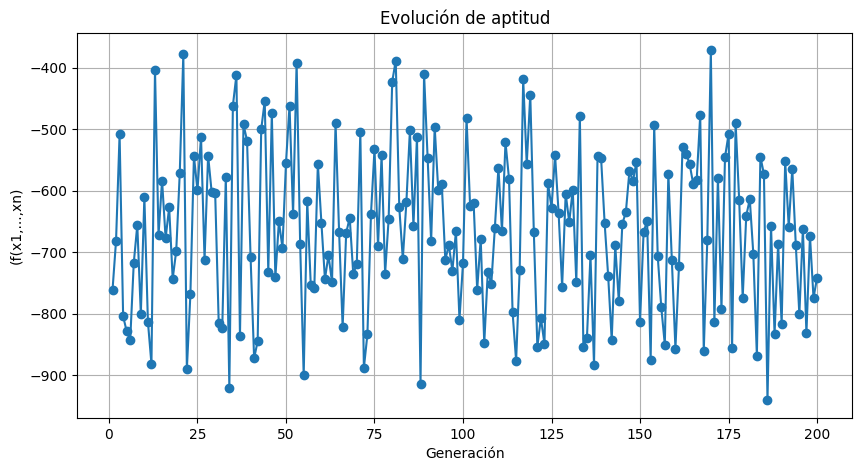

In [ ]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
     
    while generacion < generaciones:
        generacion += 1
        
        evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
        mejor_ahora = min(evaluar)
        mejor_var = evaluar.index(mejor_ahora)

        h.append(mejor_ahora) 

        if mejor_ahora < mejor_aptitud:
            mejor_aptitud = mejor_ahora
            mejor_hijo = pob[mejor_var]
        
        print(f"Generación {generacion} - Mejor evaluación: {round(mejor_ahora, decimales)}")
        
        # condición de paro
        if round(mejor_ahora, decimales) <= target:
            print("se ha alcanzado el objetivo.")
            
            break
        
        # nueva población
        new_pob = []
        while len(new_pob) < pob_size:
            
            padre1, _ = vasconcelos(pob, m, a, b, decimales, epsilon)
            padre2, _ = vasconcelos(pob, m, a, b, decimales, epsilon)
            
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob.append(hijo1)
            if len(new_pob) < pob_size:
                new_pob.append(hijo2)
        pob = np.array(new_pob)
    
    mejor_calificado = eva_funcion(mejor_hijo, m, a, b, decimales)
    return mejor_hijo, mejor_calificado, mejor_aptitud, generacion, h

def main():
    
    mejor_ind, mejor_calificado, mejor_api, generacion, h= AG( pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("(f(x1,...,xn)")
    plt.title("Evolución de aptitud")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
